In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [2]:
#a = np.linspace(1, 50, 20)
hip = 0.4
#a = np.concatenate(np.linspace(0, hip, 30), np.linspace(hip, 0, 30))
a = np.linspace(0, hip, 30)
a = np.concatenate((a, a[::-1]), axis=0)
a +=  np.random.normal(a.shape) + np.random.random(a.shape)/500 

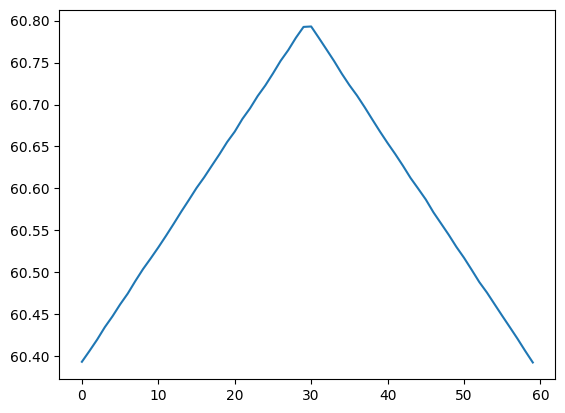

In [3]:
plt.plot(a)

In [4]:
vel = np.diff(a, 1)

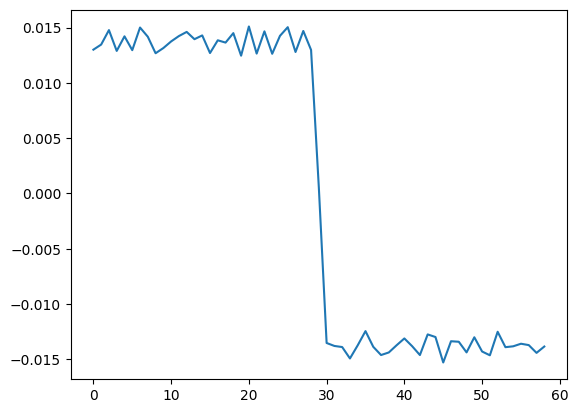

In [5]:
plt.plot(vel)

In [6]:
acc = np.diff(vel, 1)

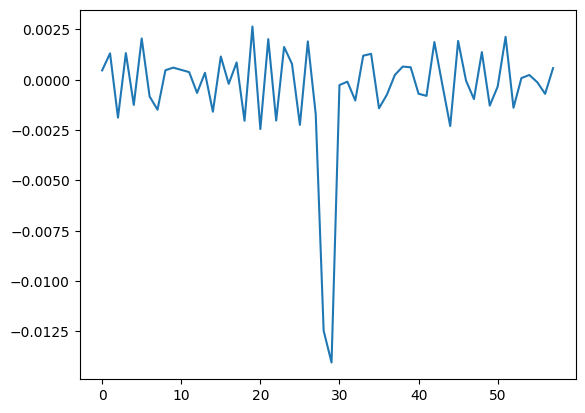

In [7]:
plt.plot(acc)

In [8]:
deadlift = [(a + np.random.normal(a.shape) + np.random.random(a.shape)/500, 0) for i in range(100)]

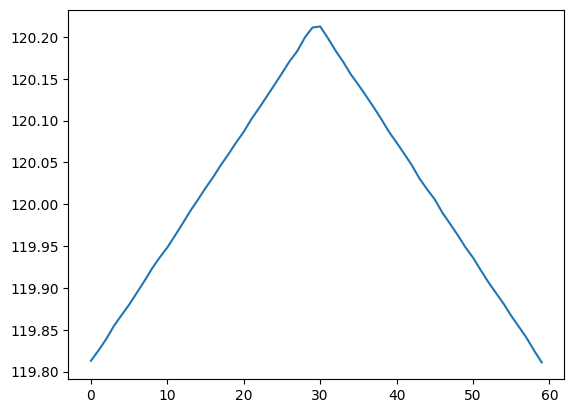

In [9]:
plt.plot(deadlift[0][0])

In [10]:
t = pd.read_json('bench.json')

In [11]:
t.head()

,relativeAltitude,seconds_elapsed,pressure,sensor,time,device id,version,device name,sampleRateMs,recording epoch time,...,gravityX,rotationRateY,rotationRateZ,gravityY,quaternionX,quaternionY,quaternionZ,gravityZ,accelerationX,rotationRateX
0,0.10,5.470672,100.772049,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.08,7.821232,100.772728,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.05,10.384219,100.773903,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.08,12.932914,100.773659,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.13,15.516082,100.772987,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
t.axes

[RangeIndex(start=0, stop=2201, step=1),
 Index(['relativeAltitude', 'seconds_elapsed', 'pressure', 'sensor', 'time',
        'device id', 'version', 'device name', 'sampleRateMs',
        'recording epoch time', 'recording time', 'platform', 'standardisation',
        'recording timezone', 'appVersion', 'sensors', 'accelerationY',
        'quaternionW', 'accelerationZ', 'gravityX', 'rotationRateY',
        'rotationRateZ', 'gravityY', 'quaternionX', 'quaternionY',
        'quaternionZ', 'gravityZ', 'accelerationX', 'rotationRateX'],
       dtype='object')]

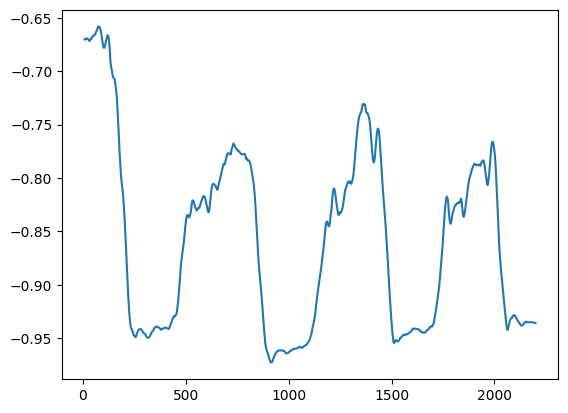

In [13]:
plt.plot(t['gravityX'])

In [49]:
axes = ['gravityX', 'gravityY', 'gravityZ', 'rotationRateX', 'rotationRateY', 'rotationRateZ']
bench = []
window_size=500
total_n = 2000
for i in range(0,total_n - window_size):
    temp = []
    for e in axes:
        temp.append(np.array(t[e][i:i+500]))

    bench.append(np.array(temp))

def parse_json(path, axes=axes):
    u = pd.read_json(path)
    out = []
    for i in range(0,total_n - window_size):
        temp = []
        for e in axes:
            temp.append(np.array(t[e][i:i+500]))

        out.append(np.array(temp))
    
    return out
    

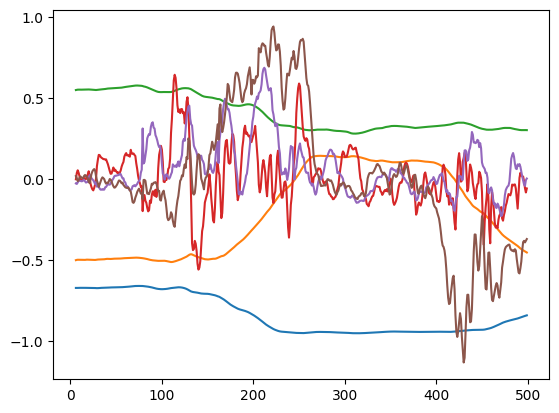

In [37]:
for i in range(len(bench[2])):
    plt.plot(bench[2][i])

In [57]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  


In [55]:
deadlift = parse_json('deadlift.json')

In [ ]:
classes = {'deadlift': 1, 'bench': 0}
x = deadlift + bench
y = [classes['deadlift']] * len(deadlift) + [classes['bench']] * len(bench)

x_train, x_test, y_train, y_test = 